# Data Summary and Visualization of the MAC PACK '19

The "Mac Pack" is what the Macalester Men's Cross Country Team is fondly known as, given to our current coach Matt Haugen. He deems the "Mac Pack Era" as the time in which he has been head coach, which has been since the early 2000s. The team nickname is a play-on-words to indicate that we run in packs, which is important in cross country since we the goal is to try to minimize the number of points the team collects in a meet.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import qgrid
from IPython.display import display, HTML

sns.set(style="whitegrid")

This reads in the csv file that was created from the python script dedicated to web scraping meet results and creating a full data frame containing information on all the meets that the men's cross country team competed in this year. It drops an unused variable left over from that process.

In [2]:
MeetInfo = pd.read_csv("MeetTimes_19.csv")
MeetInfo = MeetInfo.drop(['Unnamed: 0'], axis=1)
MeetInfo.head()

,PL,TEAMPLACE,LASTNAME,FIRSTNAME,YEAR,TEAM,Avg. Mile,TIME,SCORE,MEET,1K,2.4K,4.5K,7K,5k,3K,5.8K
0,8.0,1,Lepak,Jake,SR-4,Macalester,5:20.6,21:22.1,8.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13.0,2,Johnson,Adrian,JR-3,Macalester,5:25.4,21:41.4,13.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,16.0,3,Hayes,August,FR-1,Macalester,5:30.4,22:01.4,16.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,17.0,4,Reyes Herrera,Edwin,SR-4,Macalester,5:31.5,22:05.9,17.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19.0,5,Mayse,Smith,SO-2,Macalester,5:31.7,22:06.7,19.0,Twin Cities Invitational,NaN,NaN,NaN,NaN,NaN,NaN,NaN


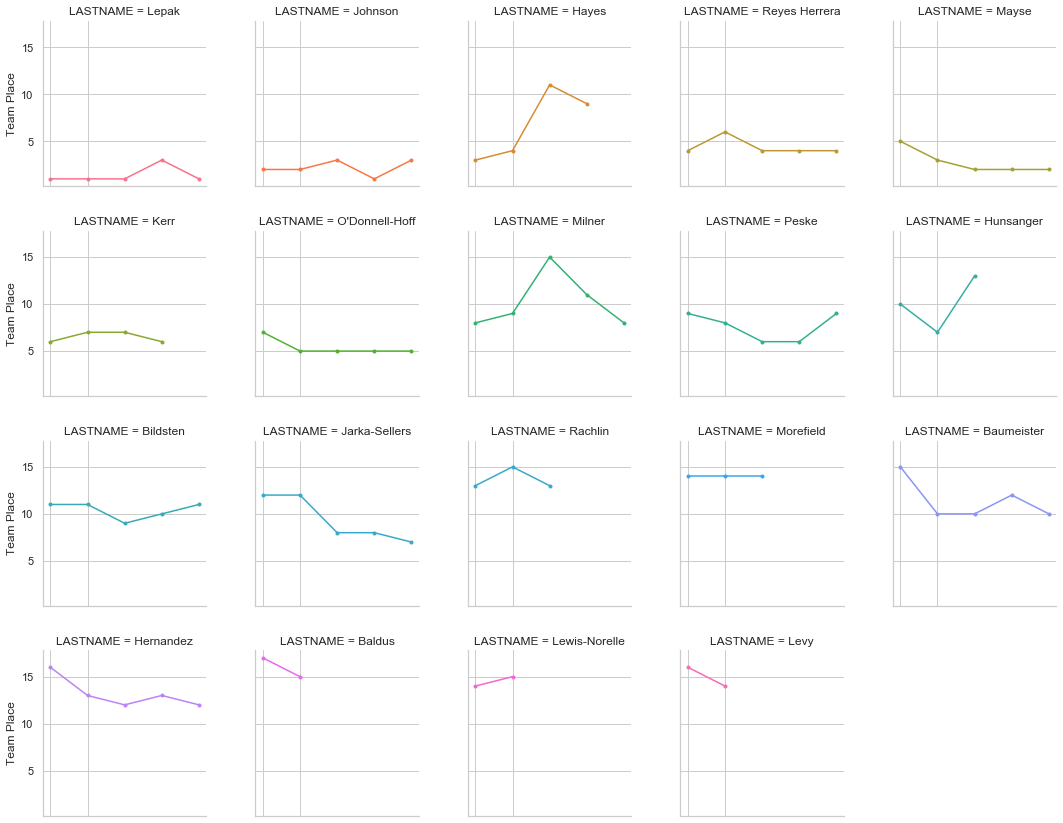

In [3]:
g = sns.FacetGrid(MeetInfo, col="LASTNAME", hue = "FIRSTNAME", col_wrap=5)
(g.map(plt.plot,"MEET", "TEAMPLACE", marker=".")
.set_axis_labels("", "Team Place")
.set_xticklabels([]))

Uses `plotnine` module to create plot using ggplot commands
Interesting to note that seom syntax still follows python commands

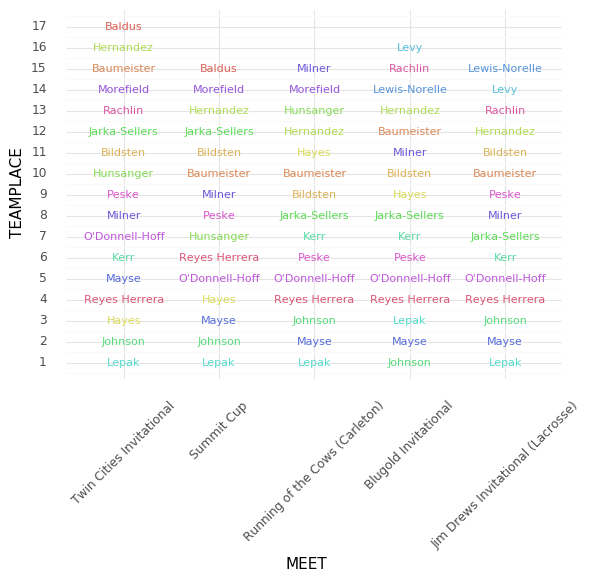

<ggplot: (299516609)>

In [4]:
from plotnine import *
(ggplot(MeetInfo, aes(x = "MEET", y = "TEAMPLACE", label = "LASTNAME", color = "LASTNAME")) + 
    geom_text(size = 8) +
    theme_minimal() +
    theme(axis_text_x=element_text(angle = 45), legend_position ="none") +
    scale_y_continuous(breaks = list(range(1,18, 1))) + 
    scale_x_discrete(limits = ["Twin Cities Invitational", "Summit Cup", "Running of the Cows (Carleton)",
                              "Blugold Invitational", "Jim Drews Invitational (Lacrosse)"]))

* uses `value_counts` to find the number of times a runner appears in the dataset, which also reflects how many meets a runner participated in this year
* Converted into a dataframe, column renamed to "Count"

In [6]:
runnerMeets = pd.DataFrame(MeetInfo.LASTNAME.value_counts())
runnerMeets.columns = ["Count"]
runnerMeets

,Count
Hernandez,5
Jarka-Sellers,5
Reyes Herrera,5
Lepak,5
O'Donnell-Hoff,5
Bildsten,5
Mayse,5
Milner,5
Baumeister,5
Peske,5


* Takes the dataframe above, filters so that it only has those where count = 5, then gets the names of those runners by using `.index` and saving them into a list
* This will be used to calculate total score runner contributed

In [7]:
scorers = list(runnerMeets[runnerMeets.Count == 5].index)
scorers

['Hernandez',
 'Jarka-Sellers',
 'Reyes Herrera',
 'Lepak',
 "O'Donnell-Hoff",
 'Bildsten',
 'Mayse',
 'Milner',
 'Baumeister',
 'Peske',
 'Johnson']

* First: Filters original `MeetInfo` dataset to only include those in which runners were in the top 7 (i.e. scored)
* Then, it filters again to only include runners in which participated in all meets by referencing `scorers` list above with those names
* Groups by Last Name, sums the total score they accumulated for all meets, and changes the index into columns using `.reset.index()`

In [9]:
top7Scores = MeetInfo[MeetInfo.TEAMPLACE.isin(range(1,8))]
top7Scores2 = top7Scores[top7Scores.LASTNAME.isin(scorers)]
top7Scores2 = top7Scores2.groupby("LASTNAME").sum()[['SCORE']].reset_index()
top7Scores2

,LASTNAME,SCORE
0,Jarka-Sellers,129.0
1,Johnson,191.0
2,Lepak,169.0
3,Mayse,207.0
4,O'Donnell-Hoff,366.0
5,Peske,231.0
6,Reyes Herrera,326.0


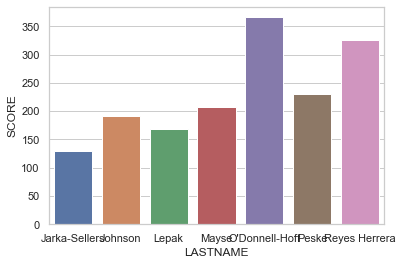

In [10]:
sns.barplot(x="LASTNAME", y="SCORE", data=top7Scores2)

* Doing this to show that only 5 members consistently were on the scoring team, so can only plot their total scores for the year since they would be higher than those who only sometimes were on the scoring team.

In [11]:
top7Scores.groupby("LASTNAME").count()[["SCORE"]].reset_index()

,LASTNAME,SCORE
0,Hayes,2
1,Hunsanger,1
2,Jarka-Sellers,1
3,Johnson,5
4,Kerr,4
5,Lepak,5
6,Mayse,5
7,O'Donnell-Hoff,5
8,Peske,2
9,Reyes Herrera,5


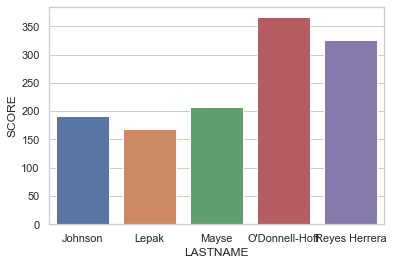

In [13]:
top7Scores2 = top7Scores2[~top7Scores2.LASTNAME.isin(["Jarka-Sellers", "Peske"])]
# top7Scores2.drop([0,5])
sns.barplot(x="LASTNAME", y="SCORE", data=top7Scores2)